# 1. Introduction

In this study, I will be researching the Biodiversity in National Parks in the US. The National Parks are areas of land protected by the government to preserve the ecosystems. There are 63 national parks in the US, and in this dataset we cover 4 of them. These are: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park. 


I want to answer a couple of questions in this study:
1) Since the species info dataset has conservation status, we can look into the distribution of species that are in danger between the four parks.
2) How many observations of species do we have at each park

At the end of the study, I want to look into the category column in the species info dataset. It is a little bit of a useless column unless not all the species are mammals. We will have a look into this as an added extra.

# 2. Analysis

We must being the analysis by importing any libraries I will need. This initially will be pandas, numpty and matplotlib. We may also add seaborn later on. We also need to read the datasets into the notebook, and we can find the number of rows in each dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
obs = pd.read_csv("observations.csv")
print(obs.size)
obs.head()


69888


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
species = pd.read_csv("species_info.csv")
print(species.size)
species.head()

23296


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Before we start, we know that each of the parks are National Parks, so lets get rid of those so we have shorter names in the obs dataset

In [4]:
obs["park_name"] = obs["park_name"].str.split("National", expand = True)[0]
print(list(obs.park_name.unique()))
obs.head()

['Great Smoky Mountains ', 'Yosemite ', 'Bryce ', 'Yellowstone ']


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85


## 2.1 Conservation Status by National Park

We want to look at the distribution of species that are in the national parks for a reason, for example recovering from being endangered or even being endangered. We need information from both datasets so seperate these species, then combine the datasets.

0
We have 179 species in the dataset
['Endangered', 'In Recovery', 'Species of Concern', 'Threatened']
['Bryce ', 'Great Smoky Mountains ', 'Yellowstone ', 'Yosemite ']


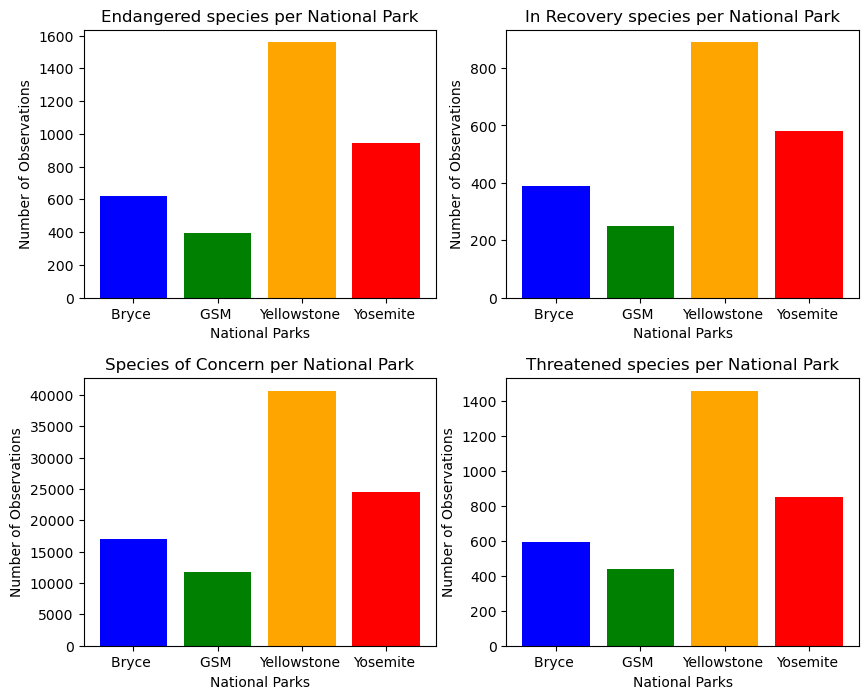

<Figure size 640x480 with 0 Axes>

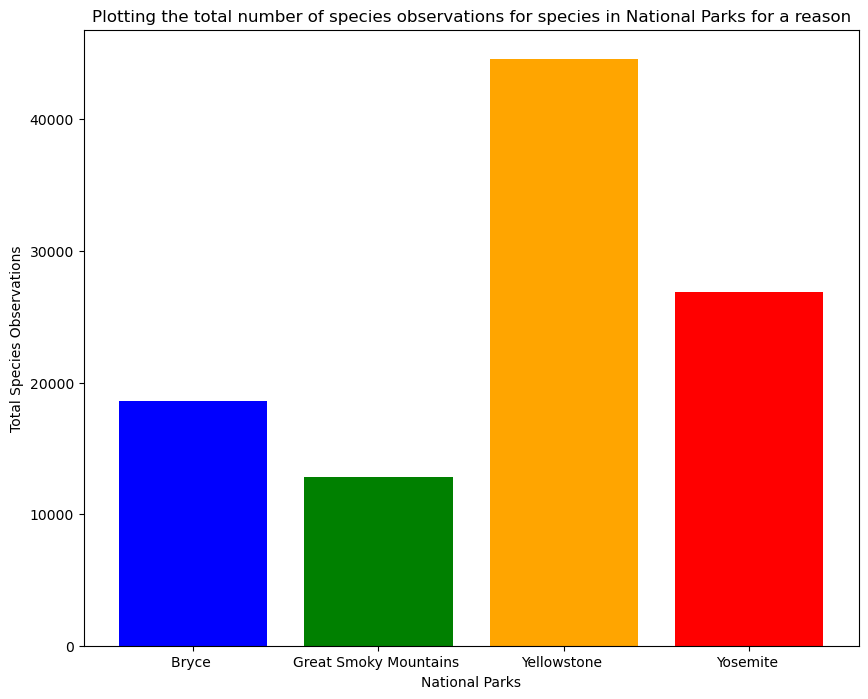

<Figure size 640x480 with 0 Axes>

In [42]:
# Creating a boolean mask for all NaN values in conservation status column
no_reason = species.conservation_status.isna()
# Creating a dataframe with the inverse of the bolean mask
reason = species[~no_reason]

# Joining the two datasets with just scientific names in both datasets
obs_for_reason_species = pd.merge(reason, obs, on='scientific_name', how='left')

# Do we have an observation for each species in each park?
obs_spec_park = obs_for_reason_species.groupby(["scientific_name"], as_index = False).agg({"park_name":"count"}).reset_index()
obs_spec_park = obs_spec_park.rename(columns = {"park_name":"no_of_parks"})
obs_spec_park_not_4 = obs_spec_park[obs_spec_park.no_of_parks <4]
print(obs_spec_park_not_4.size)
# Since we have no observations "obs_spec_park_not_4", this means every species that has a reason for being in a national park is in all 4 parks

# How many species do we have?
print("We have {} species in the dataset".format(obs_spec_park["index"].count()))

# 179 species is a lot to put into a graph, so lets group them by the conservation status column and plot the total number of obervations into a bar chart
obs_park_conserve = obs_for_reason_species.groupby(["park_name","conservation_status"]).agg({"observations":"sum"}).reset_index()
obs_park_conserve.head()
# We may have a slight issue after viewing the first 5 rows.The species of concern observations are much larger than any other category. We shall create seperate bar charts instead
convervation_status_list = list(obs_park_conserve.conservation_status.unique())
print(convervation_status_list)

national_parks_list = list(obs_park_conserve.park_name.unique())
print(national_parks_list)

# Creating a function to apply different colours for the different parks
def colours(row):
    if row["park_name"] == national_parks_list[0]:
        return "blue"
    elif row["park_name"] == national_parks_list[1]:
        return "green"
    elif row["park_name"] == national_parks_list[2]:
        return "orange"
    elif row["park_name"] == national_parks_list[3]:
        return "red"
obs_park_conserve["colours"] = obs_park_conserve.apply(colours, axis = 1)
obs_park_conserve.head()
    
# Creating a 2x2 subplot of each possible conservation status
plt.figure(figsize = (10,8))
for i, status in enumerate(convervation_status_list):
    ax = plt.subplot(2,2,(i+1))
    dataset = obs_park_conserve[obs_park_conserve["conservation_status"] == convervation_status_list[i]]
    plt.bar(x = dataset.park_name, height = dataset.observations, color = dataset.colours)
    ax.set_xticks(range(4))
    ax.set_xticklabels(['Bryce ', 'GSM ', 'Yellowstone ', 'Yosemite '])
    plt.xlabel("National Parks")
    plt.ylabel("Number of Observations")
    if convervation_status_list[i] == "Species of Concern":
        plt.title("{} per National Park".format(convervation_status_list[i]))
    else:
        plt.title("{} species per National Park".format(convervation_status_list[i]))
plt.subplots_adjust(hspace = 0.3)
plt.show()
plt.clf()

# To accompany this subplot, I want to plot the total observations from each National Park
obs_park_conserve_total = obs_park_conserve.groupby("park_name", as_index = False).agg({"observations":"sum"})
obs_park_conserve_total["colours"] = obs_park_conserve_total.apply(colours, axis = 1)


plt.figure(figsize = (10,8))
plt.bar(x = obs_park_conserve_total.park_name, height = obs_park_conserve_total.observations, color = obs_park_conserve_total.colours)
plt.xlabel("National Parks")
plt.ylabel("Total Species Observations")
plt.title("Plotting the total number of species observations for species in National Parks for a reason")

plt.show()
plt.clf()

From the subplot above, we can see that Species of Concern has the most observations overall with the lowest value being higher than the values in any other graphs. These graphs may be a little biased as Yellowstone has the highest observations in each graph. The next thing to check is how many observations we have for each National Park. The large graph shows all observations, and our assumption is correct. Yellowstone has over 40000 observations, about 15000 more then the next largest. A better way to compare may be to look at percentages instead.

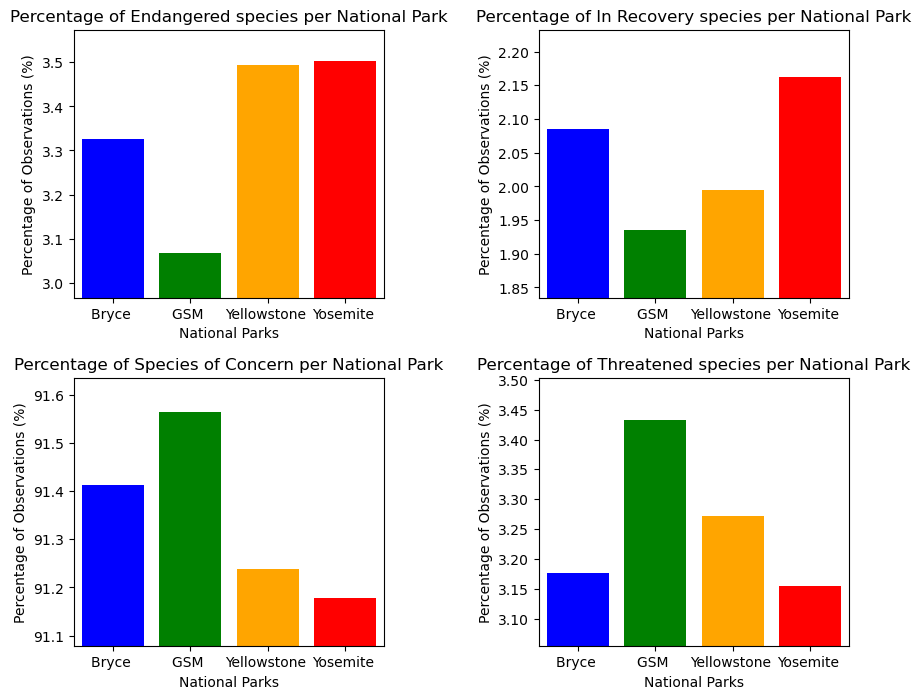

<Figure size 640x480 with 0 Axes>

In [95]:
# Create a list of the total number of observations per park
total_obs_per_park = list(obs_park_conserve_total.observations)

# Create a function that we will apply to the database to make a column of percentages rather then the sum of the observations
def perc_obs(row):
    if row["park_name"] == national_parks_list[0]:
        return row["observations"] /total_obs_per_park[0] * 100
    elif row["park_name"] == national_parks_list[1]:
        return row["observations"] /total_obs_per_park[1] * 100
    elif row["park_name"] == national_parks_list[2]:
        return row["observations"] /total_obs_per_park[2] * 100
    elif row["park_name"] == national_parks_list[3]:
        return row["observations"] /total_obs_per_park[3] * 100
obs_park_conserve["perc_obs(%)"] = obs_park_conserve.apply(perc_obs, axis = 1)
obs_park_conserve.head()
     
# Copy and paste the code we did earlier just changing the columns we use
# After using the same code as last time, it is clearer if we zoom in on the top of the graphs. It means we can compare each bar a little easier

plt.figure(figsize = (10,8))
for i, status in enumerate(convervation_status_list):
    ax = plt.subplot(2,2,(i+1))
    dataset = obs_park_conserve[obs_park_conserve["conservation_status"] == convervation_status_list[i]]
    plt.bar(x = dataset.park_name, height = dataset["perc_obs(%)"], color = dataset.colours)
    minimum = dataset.perc_obs.min()
    maximum = dataset.perc_obs.max()
    plt.axis([-0.5,3.5,(minimum - 0.1), (maximum + 0.07)])
    ax.set_xticks(range(4))
    ax.set_xticklabels(['Bryce ', 'GSM ', 'Yellowstone ', 'Yosemite '])
    plt.xlabel("National Parks")
    plt.ylabel("Percentage of Observations (%)")
    if convervation_status_list[i] == "Species of Concern":
        plt.title("Percentage of {} per National Park".format(convervation_status_list[i]))
    else:
        plt.title("Percentage of {} species per National Park".format(convervation_status_list[i]))
plt.subplots_adjust(hspace = 0.3, wspace = 0.5)
plt.show()
plt.clf()

With these graphs, we can tell that Yosemite National Park has the highest percentage of Endangered and In Recovery Species while having the lowest percentage of Species of Concern and Threatened species with repect to the total observations in the parks. On the other hand, the Great Smokey Mountain National Park has the lowest percentage of Endangered and In Recovery Species while having the highest percentage of Species of Concern and Threatened species. It seems that the Yosemite National Park is more catered towards nurturing whereas the GSM National Park is more catered towards prevention.

From raw numbers, the Yellowstone National Park has the most observations and the most diversity but by percentage, Bryce National Park has the most diversity, since it it is middling in all varieties

## 2.2 Observations Per Park

We almost came across this earlier in the study for the major question. With 179 species and 4 parks, it is a little difficult to plot each one so we won't be creating any graphs that include all values. We also know that the Yellowstone National Park has the most observations so to make it less biased we should use percentages again. We will sort by perc_obs and plot the top 10 and the bottom 10 to see which park contains the highest and lowest percentage observations.

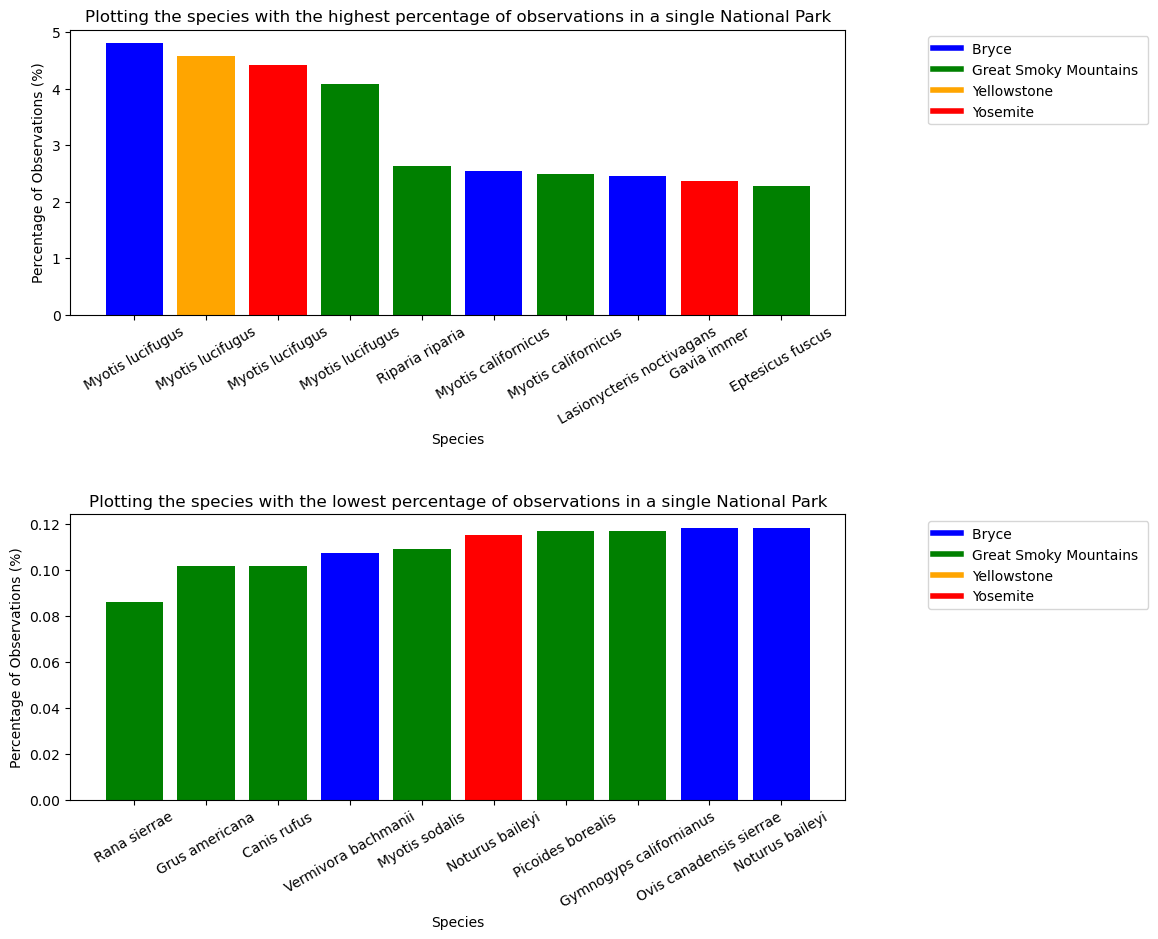

In [160]:
import matplotlib.lines as mplines

obs_spec = obs_for_reason_species.groupby(["scientific_name", "park_name"], as_index = False).agg({"observations":"sum"}).reset_index()
obs_spec["perc_obs(%)"] = obs_spec.apply(perc_obs, axis = 1)
obs_spec["colours"] = obs_spec.apply(colours, axis = 1)

# Sorting our new dataset in Ascending and descending order and taking the top and bottom 10
obs_spec_sorted_Desc = obs_spec.sort_values(by = "perc_obs(%)", ascending = False)[:10]
obs_spec_sorted_Asc = obs_spec.sort_values(by = "perc_obs(%)", ascending = True)[:10]

# Using a subplot to plot both sorted datasets
plt.figure(figsize = (10,10))
ax1 = plt.subplot(2,1,1)
# Plot the bar chart
plt.bar(x = range(10), height = obs_spec_sorted_Desc["perc_obs(%)"], color = obs_spec_sorted_Desc.colours)
# Sorting the xticks
ax1.set_xticks(range(10))
ax1.set_xticklabels(list(obs_spec_sorted_Desc.scientific_name))
plt.xticks(rotation = 30, fontsize = 10)
# Sorting Labels
plt.xlabel("Species")
plt.ylabel("Percentage of Observations (%)")
plt.title("Plotting the species with the highest percentage of observations in a single National Park")
# Sorting the Legend
legend_elements = [mplines.Line2D([0], [0], color='blue', lw=4, label=national_parks_list[0]),
                   mplines.Line2D([0], [0], color='green', lw=4, label=national_parks_list[1]),
                   mplines.Line2D([0], [0], color='orange', lw=4, label=national_parks_list[2]),
                   mplines.Line2D([0], [0], color='red', lw=4, label=national_parks_list[3])]
plt.legend(handles=legend_elements, fontsize = 10, bbox_to_anchor = (1.4,1))


# Subplot 2
ax2 = plt.subplot(2,1,2)
# Plotting 
plt.bar(x = range(10), height = obs_spec_sorted_Asc["perc_obs(%)"], color = obs_spec_sorted_Asc.colours)
# Sorting the xticks
ax2.set_xticks(range(10))
ax2.set_xticklabels(list(obs_spec_sorted_Asc.scientific_name))
plt.xticks(rotation = 30, fontsize = 10)
# Sorting the axis labels
plt.xlabel("Species")
plt.ylabel("Percentage of Observations (%)")
plt.title("Plotting the species with the lowest percentage of observations in a single National Park")
# Sorting the legend
legend_elements = [mplines.Line2D([0], [0], color='blue', lw=4, label=national_parks_list[0]),
                   mplines.Line2D([0], [0], color='green', lw=4, label=national_parks_list[1]),
                   mplines.Line2D([0], [0], color='orange', lw=4, label=national_parks_list[2]),
                   mplines.Line2D([0], [0], color='red', lw=4, label=national_parks_list[3])]
plt.legend(handles=legend_elements, fontsize = 10, bbox_to_anchor = (1.4,1))


plt.subplots_adjust(hspace = 0.7)
plt.show()

It seems that the top 10 has a little more variety in the National Park they are in compared to the bottom 10. It is interesting to see that Myotis Lucifugus is the top 4 highest percentage. After looking them up, I'm surprised they are brown bats. Also in the top 10 are California Bats, which makes it 6/10 are bats.

# 3. Conclusion

In this study, I've looked into the distribution of species that are living in teh National Parks for a reason and the top and bottom 10 species by percentage. We've found that the Yellowstone National Park has the most observations of species that are cared for but when we break it down to percentage of population, Yellowstone never has the highest percentage in any category. We also found that Bryce National Park has the most diverse conservation status'. We also found that Bats are the most common species in the top 10, with the same bat being in the top 4 slots. We also found that the Great Smoky Mountains has 6 in the bottom 10, although they have 4 of the top 10 slots. If I worked further, I'd look into whether the category column has anything that isn't Mammal, and how they are distributed across the different National Parks